# Implement a Decision Tree
Hanna Meinikheim

CS 334 Machine Learning

10-25-2021

## Instructions
-------

The decision tree algorithm is extremely powerful, interpretable, and widely used. In this assignment, you will implement a decision tree algorithm from scratch and apply it to a data set and see how well it performs. The task is to learn to predict from one of two data sets (your choice!) 1) Predict party affiliation (Democrat/Republican) from 1984 Congressional
Voting Records, or 2) Predict whether someone has diabetes.

https://www.kaggle.com/devvret/congressional-voting-records

https://www.kaggle.com/uciml/pima-indians-diabetes-database

> (a) **The algorithm is as follows:**
> 
> - For the current node N
> 
>  - If all training examples classified correctly then
> 
>      - Stop
>
>  - Otherwise
>
>      - Compute the splitting criterion for each attribute
>
>      - Split the current node according to the attribute which maximizes the splitting criterion
>      - Recursively apply to each newly created child node Ni
> 
> (b) **Choose and implement a splitting strategy** You can implement either Information Gain or GINI as discussed in class.
> 
> (c) **Report the error rate** After growing the tree on the training set, apply it to
> your test set and report the error rate. I recommend implementing the entire
> homework in an object oriented fashion. Create a class, and create a fit function.
> Use the skills you remember from tree traversals in your algorithms class. There
> will likely be some recursive methods. You are not required to print the tree.
> 
> (d) **Push Jupyter Notebook to github**


## Decision Tree with Scikit-Learn

In [1]:
# Load libraries for Scikit-Learn Decision Tree
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# load dataset
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
             'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv("diabetes.csv",header=None, names=col_names, skiprows=[0])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# define the feature columns, X, and y
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
             'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # features
y = df.Outcome # Target variable

In [4]:
# Checking the data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Checking the 
print(df.Outcome.value_counts())
a=df.Outcome.value_counts()[0]
b=df.Outcome.value_counts()[1]
arr = [a,b]
print(arr[0], arr[1])

0    500
1    268
Name: Outcome, dtype: int64
500 268


### Split Data

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Train Decision Tree

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Model Accuracy

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


### Generate PNG image of the tree

I didn't have pydotplus or GraphViz so I needed to download both. Downloading pydotplus was no problem as I just used the code below in a jupyter notebook.
> `import sys
!{sys.executable} -m pip install GraphViz`

Dowloading GraphViz was harder and didn't work like it did above. I was forced to go to `https://graphviz.gitlab.io/_pages/Download/Download_windows.html` and download the installer from there. I also added it to the environment variables path. 

![From stackoverflow.com](DownloadingGraphViz.PNG)

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

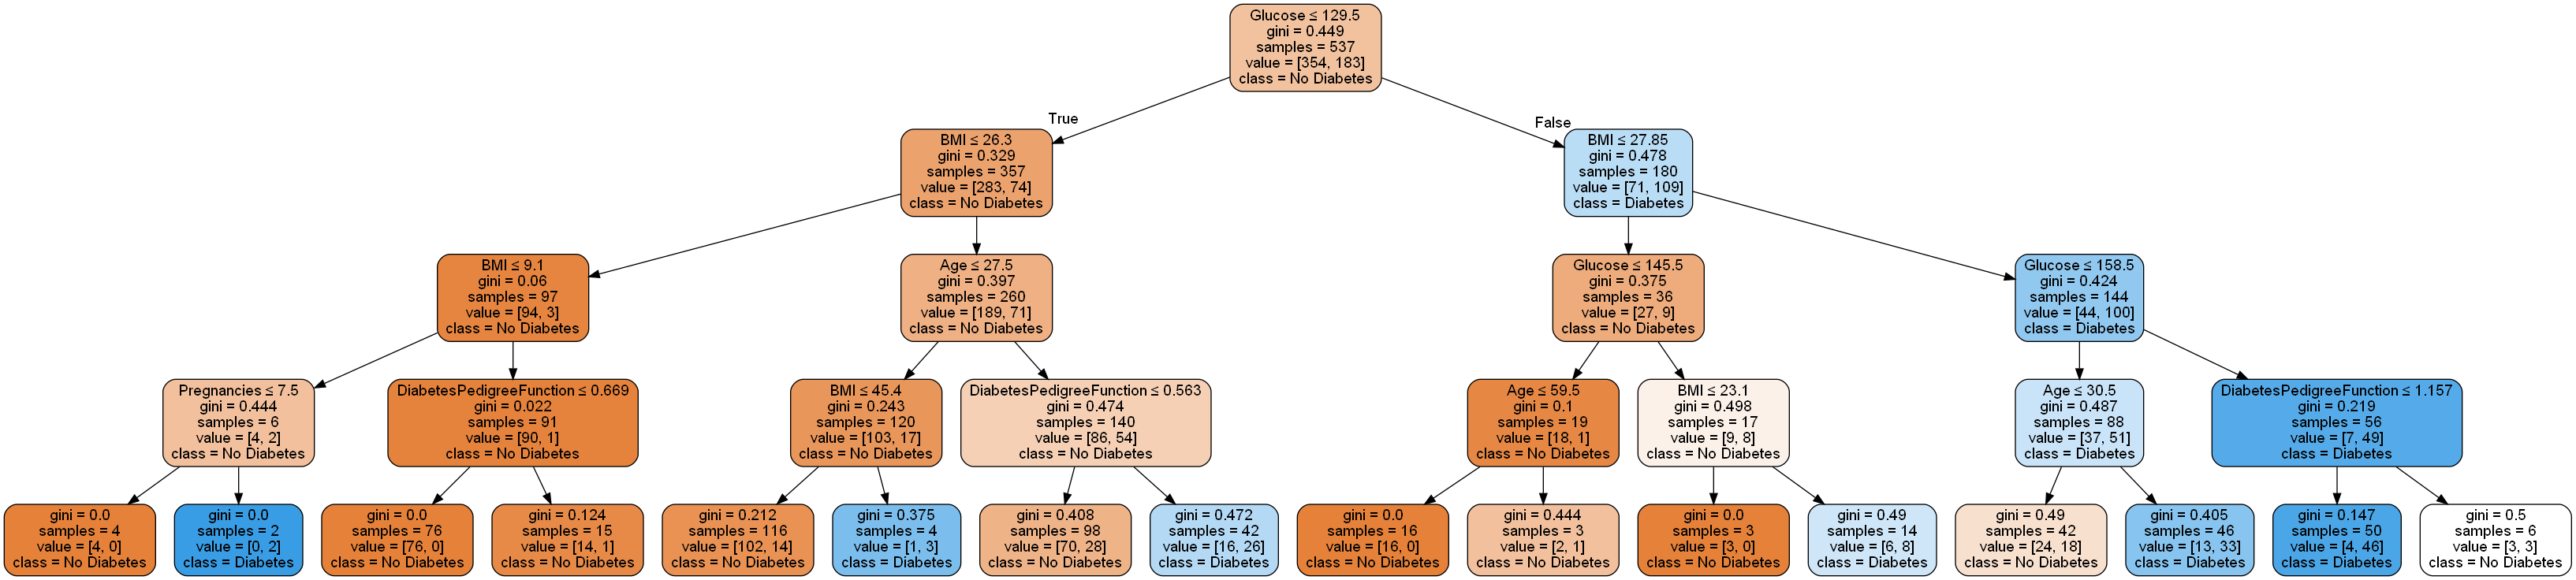

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Diabetes','Diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

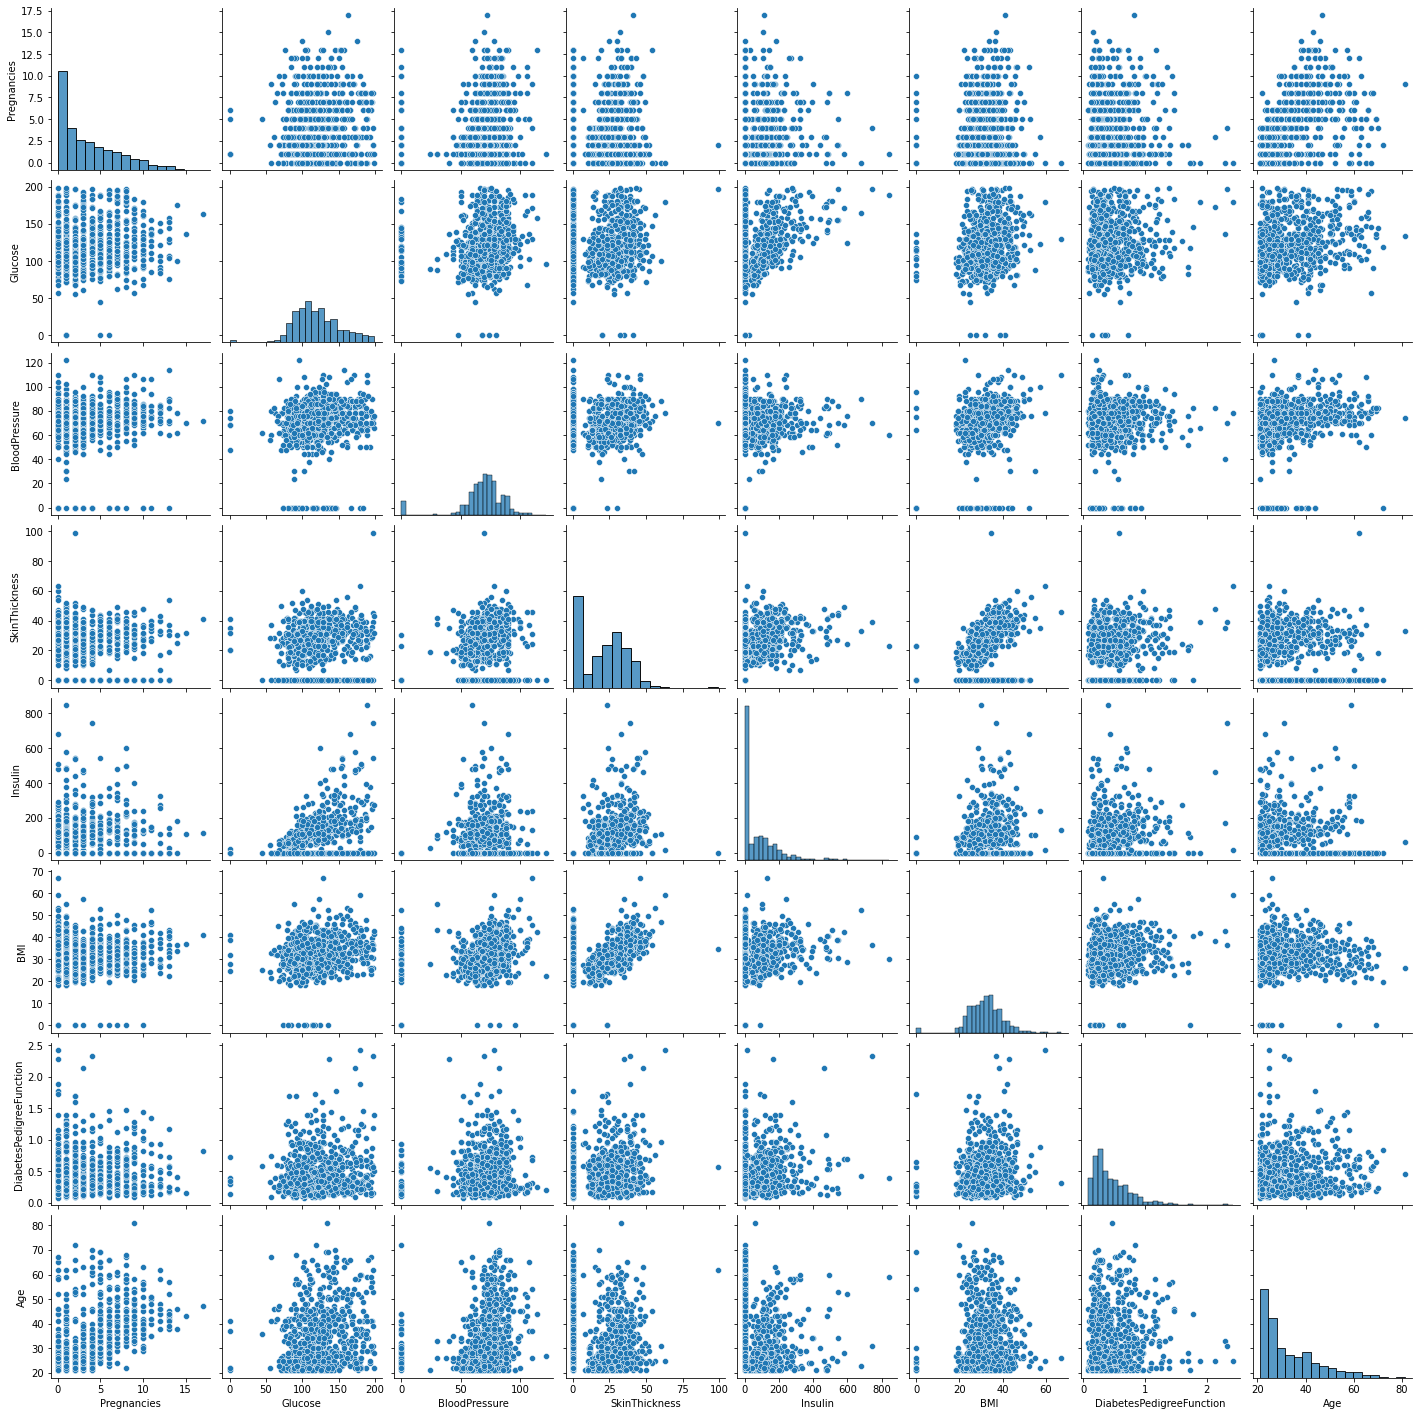

In [12]:
# Looking at the pairplots for all the features of diabetes data to look for correlations
sns.pairplot(X, diag_kind='hist')

## Write my own Decision Tree algorithm

Different parts
1. Gini Index
2. Create a Split
3. Build a Tree
4. Make a Prediction

### Define the Gini Index

In [13]:
# Calculate the Gini index for a split dataset
def gini_indexP(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    arr = [0,0]
    first = 0
    second = 0
    i = 0
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        arr[i] = size
        i += 1
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p**2
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    first = arr[0]
    second = arr[1]
    return {'gini': gini, 'first': first, 'second': second}

In [14]:
# test Gini values
print(gini_indexP([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_indexP([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))
#df3 = [[[1, 1], [1, 0]], [[1, 1], [1, 0]]]
#df3.count([[1,1], [1,0]])

{'gini': 0.5, 'first': 2.0, 'second': 2.0}
{'gini': 0.0, 'first': 2.0, 'second': 2.0}


### Creating the Split

Different Parts
1. Splitting a Dataset
2. Evaluating All the Splits

In [15]:
# Split a dataset based on an attribute and an attribute value
def test_splitP(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [16]:
# Select the best split point for a dataset
def get_splitP(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    first =  0
    second = 0
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_splitP(index, row[index], dataset)
            gini = gini_indexP(groups, class_values)
            if gini['gini'] < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini['gini'], groups
                first = gini['first']
                second = gini['second']
    return {'index':b_index, 'value':b_value, 'groups':b_groups, 'gini': b_score, 
            'first': first, 'second': second}

In [17]:
# testing that the functions work as expected
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
split = get_splitP(dataset)
list_1 = [int(split['first']), int(split['second'])]
sum_1 = sum(list_1)
print('Split: [X%d < %.3f   gini=%.3f, samples=%d, value=%s]' % ((split['index']+1), split['value'], split['gini'], sum_1, list_1))

Split: [X1 < 6.642   gini=0.000, samples=10, value=[5, 5]]


### Builidng a Tree

Different Parts
1. Terminal Nodes
2. Recursive Splitting
3. Building a Tree

In [18]:
# Create a terminal node value
def to_terminalP(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [19]:
# Recursive Splitting
# Create child splits for a node or make terminal
def splitP(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminalP(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminalP(left), to_terminalP(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminalP(left)
	else:
		node['left'] = get_splitP(left)
		splitP(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminalP(right)
	else:
		node['right'] = get_splitP(right)
		splitP(node['right'], max_depth, min_size, depth+1)

In [20]:
# Build a decision tree
def build_treeP(train, max_depth, min_size):
    root = get_splitP(train)
    splitP(root, max_depth, min_size, 1)
    return root

In [22]:
classes = [True, False]
# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        col_num = node['index']+1
        list_1 = [int(node['first']), int(node['second'])]
        sum_1 = sum(list_1)
        print('%s[X%d < %.3f   gini=%.3f, samples=%d, value=%s]' % ((depth*' ', (col_num), node['value'], node['gini'],
                                                                    sum_1, list_1)))
        # , samples=%s, node['size']
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', classes[node])))
 
dataset = [[2.771244718,1.784783929,0],
[1.728571309,1.169761413,0],
[3.678319846,2.81281357,0],
[3.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[7.497545867,3.162953546,1],
[9.00220326,3.339047188,1],
[7.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[6.642287351,3.319983761,1]]
tree = build_treeP(dataset, 1, 1)
print_tree(tree)

[X1 < 6.642   gini=0.000, samples=10, value=[5, 5]]
 [True]
 [False]


In [24]:
# testing with a bigger max_depth
tree = build_treeP(dataset, 3, 2)
print_tree(tree)

[X1 < 6.642   gini=0.000, samples=10, value=[5, 5]]
 [X1 < 2.771   gini=0.000, samples=5, value=[1, 4]]
  [True]
  [X1 < 2.771   gini=0.000, samples=4, value=[0, 4]]
   [True]
   [True]
 [X1 < 7.498   gini=0.000, samples=5, value=[2, 3]]
  [False]
  [X1 < 7.498   gini=0.000, samples=3, value=[0, 3]]
   [False]
   [False]


In [25]:
outcomes = ['No Diabetes', 'Diabetes']
# Print a decision tree using the column names for pima dataset
# feature_cols
# Print a decision tree
def print_treeP(node, depth=0):
    if isinstance(node, dict):
        feature_name = feature_cols[node['index']]
        list_1 = [int(node['first']), int(node['second'])]
        sum_1 = sum(list_1)
        max_val = max(list_1)
        max_val_index = list_1.index(max_val)
        print('%s[%s < %.3f, Gini=%.3f, samples=%s, value=%s, class=%s]' % 
              ((depth*' ', feature_name, node['value'], node['gini'], 
                sum_1, list_1, outcomes[max_val_index])))
        print_treeP(node['left'], depth+1)
        print_treeP(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', outcomes[int(node)])))

In [26]:
# build and print tree for pima diabetes data
tree = build_treeP(df.to_numpy(), 4, 10)
print_treeP(tree)

[Glucose < 128.000, Gini=0.372, samples=768, value=[485, 283], class=No Diabetes]
 [Age < 29.000, Gini=0.282, samples=485, value=[271, 214], class=No Diabetes]
  [BMI < 45.500, Gini=0.142, samples=271, value=[267, 4], class=No Diabetes]
   [BMI < 31.000, Gini=0.129, samples=267, value=[151, 116], class=No Diabetes]
    [No Diabetes]
    [No Diabetes]
   [Diabetes]
  [BMI < 26.500, Gini=0.405, samples=214, value=[41, 173], class=Diabetes]
   [BMI < 19.300, Gini=0.000, samples=41, value=[2, 39], class=Diabetes]
    [Diabetes]
    [No Diabetes]
   [Glucose < 100.000, Gini=0.436, samples=173, value=[55, 118], class=Diabetes]
    [No Diabetes]
    [No Diabetes]
 [BMI < 30.000, Gini=0.408, samples=283, value=[76, 207], class=Diabetes]
  [Glucose < 146.000, Gini=0.365, samples=76, value=[41, 35], class=No Diabetes]
   [Insulin < 135.000, Gini=0.230, samples=41, value=[28, 13], class=No Diabetes]
    [No Diabetes]
    [No Diabetes]
   [Age < 27.000, Gini=0.431, samples=35, value=[4, 31], class

In [27]:
# Make a prediction with a decision tree
def predictP(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [28]:
#  predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
    prediction = predictP(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


In [30]:
# CART on the Bank Note dataset
from random import seed
from random import randrange
from csv import reader
import csv

def load_csv2(filename):
    file = open(filename, 'rt')
    csvreader = csv.reader(file)
    header = next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)
    file.close()
    return rows
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini
 
# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root
 
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']
 
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
	tree = build_tree(train, max_depth, min_size)
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)
 
# Test CART on Bank Note dataset
seed(1)
# load and prepare data
#filename = 'data_banknote_authentication.csv'
filename = 'diabetes.csv'
dataset = load_csv2(filename)

# evaluate algorithm
n_folds = 5
max_depth = 4
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [77.77777777777779, 77.12418300653596, 72.54901960784314, 70.58823529411765, 70.58823529411765]
Mean Accuracy: 73.725%
